In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL /telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_cat = df.select_dtypes("object")

In [7]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [8]:
df_cat.drop("customerID",axis=1,inplace=True)

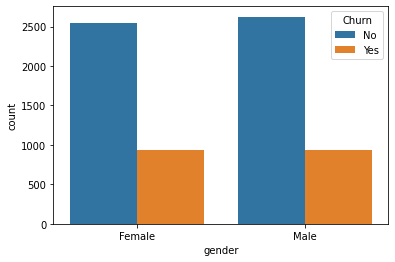

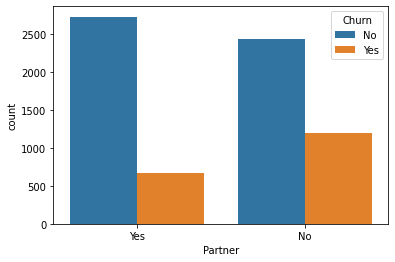

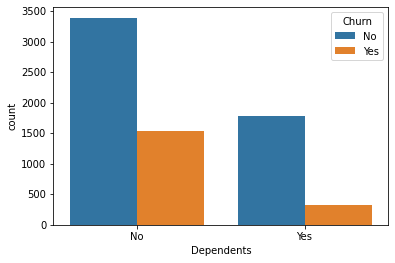

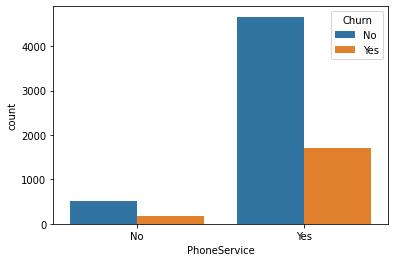

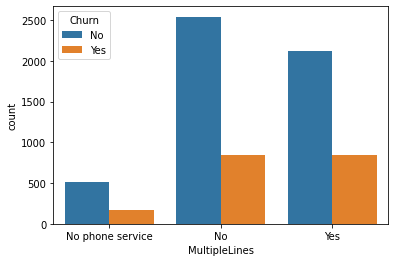

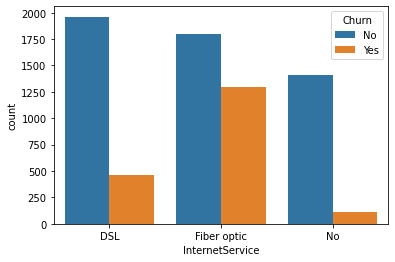

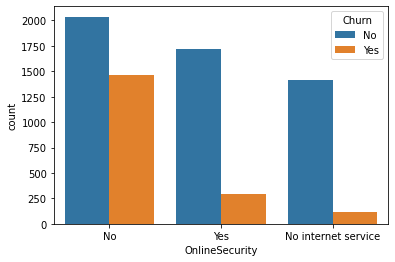

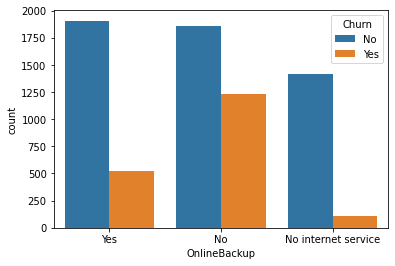

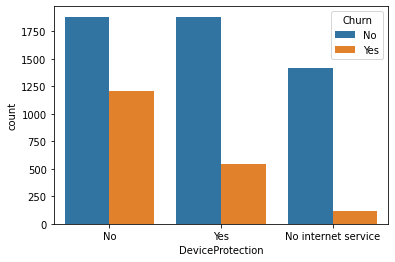

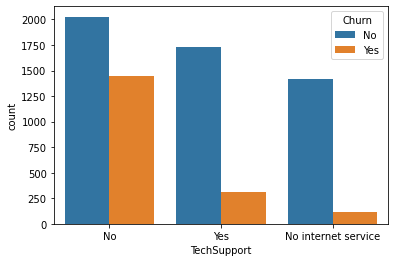

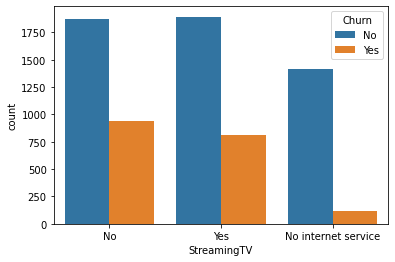

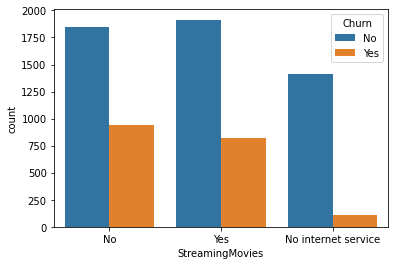

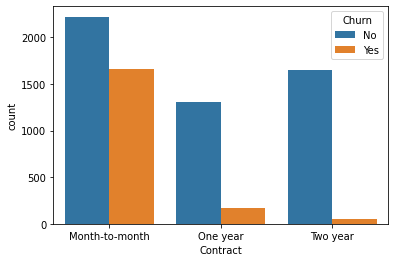

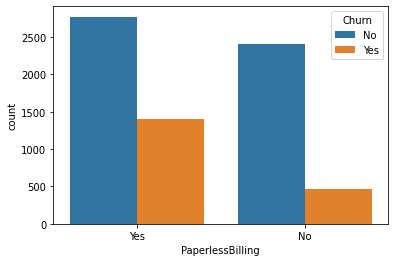

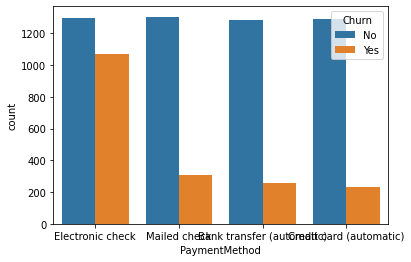

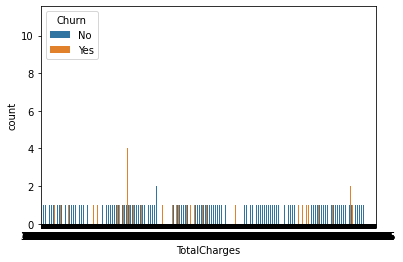

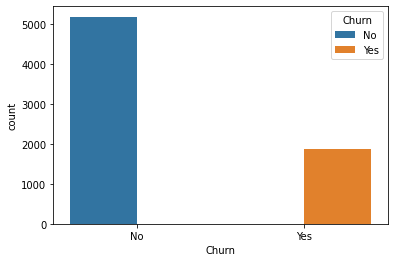

In [9]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df,x=col,hue="Churn")
  plt.show()

In [10]:
df_cat["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
2034.25     1
538.2       1
4828.05     1
1563.95     1
1224.05     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
df_cat["TotalCharges"].replace(' ',np.nan,inplace=True)

In [12]:
df_cat["TotalCharges"].isnull().sum()

11

In [13]:
df_cat["TotalCharges"] = df_cat["TotalCharges"].astype(float)

In [14]:
df_cat["TotalCharges"].fillna(df_cat["TotalCharges"].mean(),inplace=True)

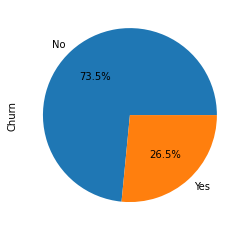

In [15]:
df_cat["Churn"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [16]:
df_num = df[["tenure","MonthlyCharges"]]

In [17]:
df_num["TotalCharges"] = df_cat["TotalCharges"]

In [18]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


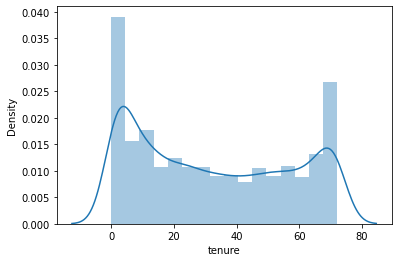

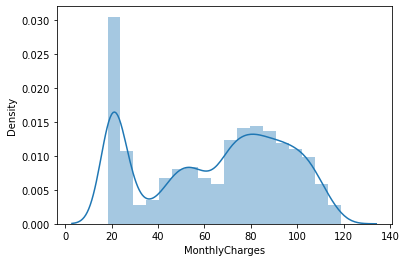

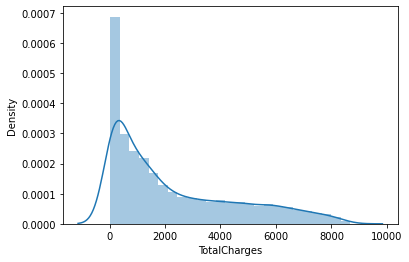

In [19]:
for col in df_num:  
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

In [20]:
df_cat.drop("TotalCharges",axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cat:
    df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
df_new = pd.concat([df_num,df_cat,df["SeniorCitizen"]],axis=1)

In [24]:
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [25]:
X = df_new.drop("Churn",axis=1)
y = df_new["Churn"]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

In [28]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Random Under Sampler.

In [29]:
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train_ss,y_train)

In [30]:
pd.Series(y_sample1).value_counts()

1    1341
0    1341
dtype: int64

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(8,input_shape=(X_sample1.shape[1],), activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 160       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [35]:
history1 = model.fit(X_sample1,y_sample1,epochs=20,batch_size=50)

Epoch 1/20
54/54 [==============================] - 1s 1ms/step - loss: 0.6692
Epoch 2/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5849
Epoch 3/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5632
Epoch 4/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5249
Epoch 5/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5272
Epoch 6/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5127
Epoch 7/20
54/54 [==============================] - 0s 916us/step - loss: 0.4997
Epoch 8/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5052
Epoch 9/20
54/54 [==============================] - 0s 1ms/step - loss: 0.4943
Epoch 10/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5069
Epoch 11/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 12/20
54/54 [==============================] - 0s 1ms/step - loss: 0.4916
Epoch 13/20
54/54 [============================

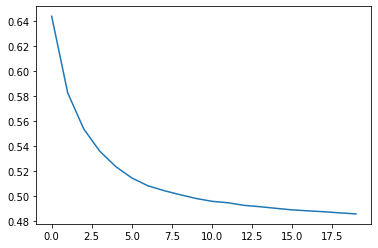

In [36]:
plt.plot(history1.history["loss"])

In [37]:
y_pred = model.predict(X_test_ss)

In [38]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1585
           1       0.51      0.80      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.82      0.76      0.77      2113



## Random Over Sampler

In [40]:
ros = RandomOverSampler(random_state=1)
X_sample2, y_sample2 = ros.fit_sample(X_train_ss,y_train)

In [41]:
pd.Series(y_sample2).value_counts()

1    3589
0    3589
dtype: int64

In [42]:
model = Sequential()
model.add(Dense(10,input_shape=(X_sample2.shape[1],), activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [45]:
history2 = model.fit(X_sample2,y_sample2,epochs=30,batch_size=50)

Epoch 1/30
144/144 [==============================] - 1s 1ms/step - loss: 0.6086
Epoch 2/30
144/144 [==============================] - 0s 1ms/step - loss: 0.5254
Epoch 3/30
144/144 [==============================] - 0s 1ms/step - loss: 0.5054
Epoch 4/30
144/144 [==============================] - 0s 1ms/step - loss: 0.5100
Epoch 5/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4910
Epoch 6/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4959
Epoch 7/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4833
Epoch 8/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4947
Epoch 9/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4911
Epoch 10/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4980
Epoch 11/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4784
Epoch 12/30
144/144 [==============================] - 0s 1ms/step - loss: 0.4856
Epoch 13/30
144/144 [====

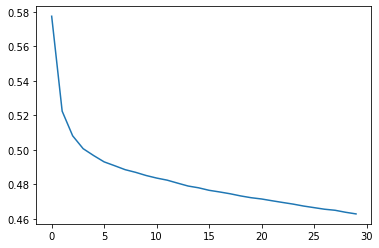

In [46]:
plt.plot(history2.history["loss"])

In [47]:
y_pred = model.predict(X_test_ss)

In [48]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1585
           1       0.51      0.75      0.61       528

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113

